In [2]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
architectures = ['test1-pol1', 'test2-pol1', 'test2-pol2']
policies = list(set([x for x in map(lambda y: y.split('-', 1)[1], architectures)]))
arch_pol_tupl_ls = [(x, y) for x, y in map(lambda x: x.split('-', 1), architectures)]
skip_layers_values = [1, 2, 3, 4, 8, 16, 32]
bench_types = ['quality', 'speed']
runs = 10

In [4]:
reports_list = os.listdir()

def printList(x):
    print()
    for entry in x:
        print(entry)
        
reports_list = list(filter(lambda x: 'speed' in x or 'quality' in x, sorted(reports_list)))
print('***************************************')
print(f'Found {len(reports_list)} files in reports.')
print('***************************************')

speed_reports = list(filter(lambda x: 'speed' in x, reports_list))
quality_reports = list(filter(lambda x: 'quality' in x, reports_list))
print()
print(f'{len(speed_reports)} Speed reports vailable: ')
printList(speed_reports)
print()
print(f'{len(quality_reports)} Quality reports available:')
printList(quality_reports)

***************************************
Found 43 files in reports.
***************************************

28 Speed reports vailable: 

speed-densenet121-none-run.csv
speed-densenet121-skip-last-n-block-run.csv
speed-densenet121-skip-last-run.csv
speed-densenet121-skip-norm-n-run.csv
speed-densenet121-skip-run.csv
speed-densenet169-none-run.csv
speed-densenet169-skip-last-n-block-run.csv
speed-densenet169-skip-last-run.csv
speed-densenet169-skip-norm-n-run.csv
speed-densenet169-skip-run.csv
speed-resnet101-drop-last-rand-n-run.csv
speed-resnet101-drop-rand-n-run.csv
speed-resnet101-none-run.csv
speed-resnet152-drop-last-rand-n-run.csv
speed-resnet152-drop-rand-n-run.csv
speed-resnet152-none-run.csv
speed-resnet18-drop-last-rand-n-run.csv
speed-resnet18-drop-norm-n-run.csv
speed-resnet18-drop-rand-n-run.csv
speed-resnet18-none-run.csv
speed-resnet34-drop-last-rand-n-run.csv
speed-resnet34-drop-norm-n-run.csv
speed-resnet34-drop-rand-n-run.csv
speed-resnet34-none-run.csv
speed-resnet50-

random
No data found in speed-densenet121-none-run.csv
      run  skip_n bench_type         arch   pol      prec       rec       acc  \
0       0       0    quality  densenet121  none  0.682875  0.682879  0.703656   
421     0       0    quality  densenet169  none  0.600423  0.600720  0.612246   
1142    0       0    quality     resnet18  none  0.684989  0.684924  0.685383   
1503    0       0    quality     resnet34  none  0.701903  0.703409  0.705718   
1864    0       0    quality     resnet50  none  0.621564  0.621515  0.609135   

            f1  time  
0     0.682744   0.0  
421   0.592302   0.0  
1142  0.671122   0.0  
1503  0.688687   0.0  
1864  0.600557   0.0  
             arch   pol      prec       rec       acc        f1
0     densenet121  none  0.682875  0.682879  0.703656  0.682744
421   densenet169  none  0.600423  0.600720  0.612246  0.592302
1142     resnet18  none  0.684989  0.684924  0.685383  0.671122
1503     resnet34  none  0.701903  0.703409  0.705718  0.688687


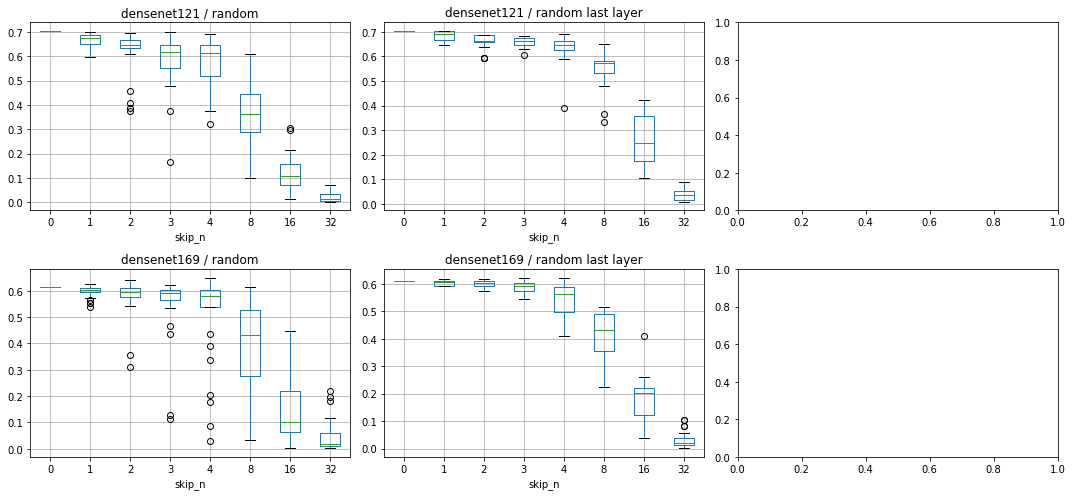

In [13]:
pol_trans = {
    'skip': 'random',
    'skip-last': 'random last layer',
    'skip-norm-n': 'normal distributed',
    'skip-last-n-block': 'even last layer',
    'drop-rand-n': 'random',
    'drop-last-rand-n': 'last layer',
    'drop-norm-n': 'normal distributed'
}

print(pol_trans['skip'])

li = []

def getDataFrameFromReports(csv_files):
    li = []
    for entry in csv_files:
        df = pd.read_csv(entry)
        if len(df) == 0:
            print("No data found in", entry)
        li.append(df)
    return pd.concat(li, axis=0, ignore_index=True)


s_df = getDataFrameFromReports(speed_reports)
q_df = getDataFrameFromReports(quality_reports)

base_q_df = q_df.query('pol == "none"')
print(base_q_df)

print(base_q_df[['arch', 'pol', 'prec', 'rec', 'acc', 'f1']])

print(s_df.columns)
print(q_df['arch'])
def printBoxPlotForArchAndPol(data_frame, arch_name, policy_name, ax):
    df, an, pn = data_frame, arch_name, policy_name

    df = df.query(f'arch == "{an}"')
    df = df.query(f'pol == "{pn}"')
    df = df.append(data_frame.query(f'arch == "{an}"').query(f'pol == "none"'))
    if len(df) == 0:
        print("No content found")
        return
    #print(df)
    bp = df.boxplot(column=['acc'], by='skip_n', figsize=(8, 6), ax=ax)
    fig = np.asarray(bp).reshape(-1)[0].get_figure()
    fig.suptitle(f'')
    ax.set_title(f'{an} / {pol_trans[pn]}')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
#q_df.boxplot(column=['acc'], by=['skip_n'], ax=axes[0, 0])
printBoxPlotForArchAndPol(q_df, 'densenet121', 'skip-last', axes[0,1])
printBoxPlotForArchAndPol(q_df, 'densenet121', 'skip', axes[0,0])
printBoxPlotForArchAndPol(q_df, 'densenet169', 'skip-last', axes[1,1])
printBoxPlotForArchAndPol(q_df, 'densenet169', 'skip', axes[1,0])
fig.tight_layout()
plt.show()



150
151
150
151
180
181
180
181
180
181
180
181


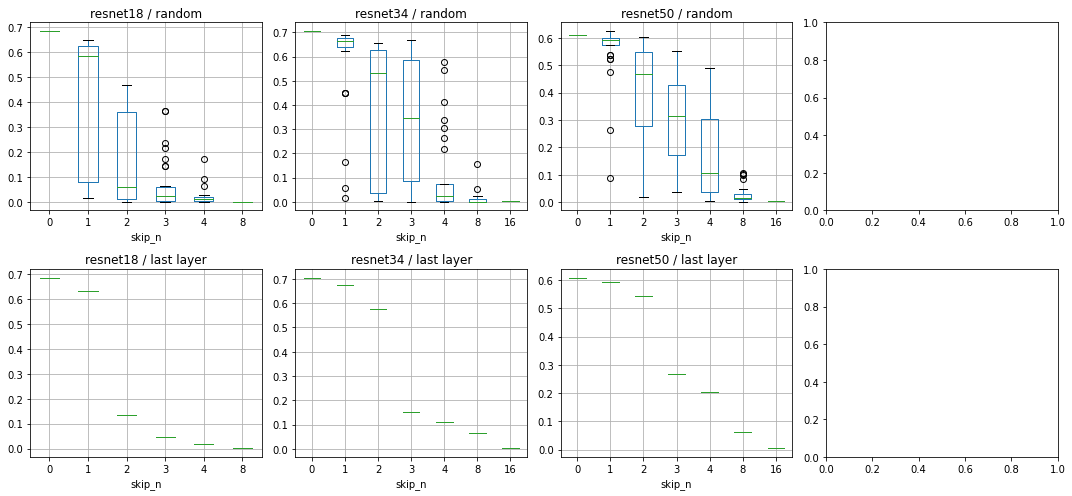

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7))

printBoxPlotForArchAndPol(q_df, 'resnet18', 'drop-rand-n', axes[0, 0])
printBoxPlotForArchAndPol(q_df, 'resnet18', 'drop-last-rand-n', axes[1, 0])
printBoxPlotForArchAndPol(q_df, 'resnet34', 'drop-rand-n', axes[0, 1])
printBoxPlotForArchAndPol(q_df, 'resnet34', 'drop-last-rand-n', axes[1, 1])
printBoxPlotForArchAndPol(q_df, 'resnet50', 'drop-rand-n', axes[0, 2])
printBoxPlotForArchAndPol(q_df, 'resnet50', 'drop-last-rand-n', axes[1, 2])
fig.tight_layout()
plt.show()

In [54]:
from scipy import stats
print(s_df)
s_df[['run', 'skip_n', 'arch', 'time']]

grouped_df = s_df.groupby(['skip_n', 'arch', 'pol']).agg({'time': ['median']}).reset_index()
grouped_df

def linePlotArch(df, arch):
    plot_df = df[df['arch'] == f'{arch}']
    plt.plot(plot_df.skip_n, plot_df.time)
    plt.show()

def linePlotArchs(df, archs, title):
    plt.title(title)
    for arch in archs:
        plot_df = df[df['arch'] == f'{arch}']
        plt.plot(plot_df.skip_n, plot_df.time,'.-', label=arch)
    plt.legend()
    #plt.xticks(df.skip_n)
    plt.ylabel('Inference Time in sec.')
    plt.xlabel('Skipped Layers')
    plt.show()

linePlotArchs(grouped_df[grouped_df['pol'] == 'drop-rand-n'], ['resnet18', 'resnet34', 'resnet50'], 'ResNet Speed / Random Drop')
linePlotArchs(grouped_df[grouped_df['pol'] == 'drop-last-rand-n'], ['resnet18', 'resnet34', 'resnet50'], 'ResNet Speed / Last N')

     run skip_n bench_type         arch                pol  prec  rec  acc  \
0      0      1      speed  densenet121  skip-last-n-block   0.0  0.0  0.0   
1      1      1      speed  densenet121  skip-last-n-block   0.0  0.0  0.0   
2      2      1      speed  densenet121  skip-last-n-block   0.0  0.0  0.0   
3      3      1      speed  densenet121  skip-last-n-block   0.0  0.0  0.0   
4      4      1      speed  densenet121  skip-last-n-block   0.0  0.0  0.0   
...   ..    ...        ...          ...                ...   ...  ...  ...   
4051  26     16      speed     resnet50        drop-rand-n   0.0  0.0  0.0   
4052  27     16      speed     resnet50        drop-rand-n   0.0  0.0  0.0   
4053  28     16      speed     resnet50        drop-rand-n   0.0  0.0  0.0   
4054  29     16      speed     resnet50        drop-rand-n   0.0  0.0  0.0   
4055   0      0      speed     resnet50               none   0.0  0.0  0.0   

       f1      time  
0     0.0  0.098095  
1     0.0  0.096114

TypeError: unsupported operand type(s) for /: 'tuple' and 'int'

In [14]:
s_df['arch'].unique()

array(['densenet121', 'densenet169', 'resnet101', 'resnet152', 'resnet18',
       'resnet34', 'resnet50'], dtype=object)

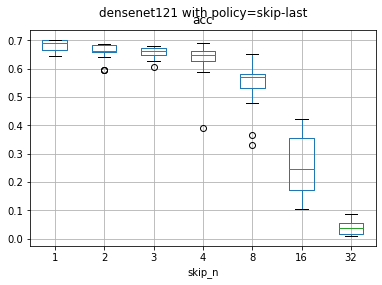

In [15]:
# skip last n layers
printBoxPlotForArchAndPol(q_df, 'densenet121', 'skip-last')

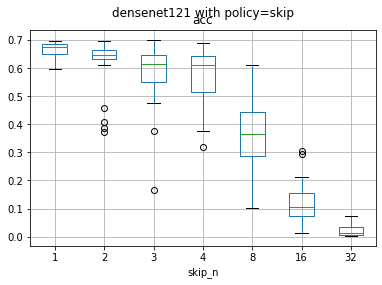

In [16]:
# skip random n layers
printBoxPlotForArchAndPol(q_df, 'densenet121', 'skip')

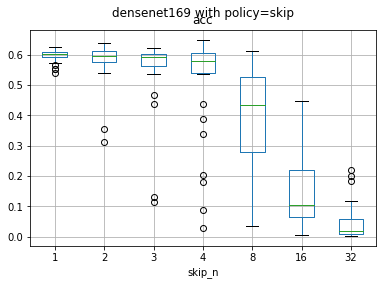

In [21]:
# skip random n layers
printBoxPlotForArchAndPol(q_df, 'densenet169', 'skip')

In [76]:
def executeQualityBench(arch_name, loader):
    prec = random.random()
    acc = random.random()
    rec = random.random()

    return prec, acc, rec

def executeSpeedBench(arch_name, loader):
    speed = random.random()
    return speed



d = {'run': [], 'skip_n': [], 'bench_type': [], 'arch': [], 'pol': [], 'prec': [], 'rec': [], 'acc': [], 'time': []}


loader = []

for bench_type in bench_types:
    for arch, pol in arch_pol_tupl_ls:
        for skip_n in skip_layers_values:
            for run in range(runs):
                prec = 0.0
                rec = 0.0
                acc = 0.0
                time = 0.0
                if bench_type == 'quality':
                    prec, acc, rec = executeQualityBench(f'{arch}-{pol}', loader)
                    #print(f'{run} - {skip_n} - {bench_type} - {arch} - {pol} - {prec:.6f} - {rec:.6f} - {acc:.6f}')
                elif bench_type == 'speed':
                    time = executeSpeedBench(f'{arch}-{pol}', loader)
                    #print(f'{run} - {skip_n} - {bench_type} - {arch} - {pol} - {time:.6f}')
                else:
                    raise ValueError('Benchmark type not supported')
                
                d['run'].append(run)
                d['skip_n'].append(skip_n)
                d['bench_type'].append(bench_type)
                d['arch'].append(arch)
                d['pol'].append(pol)
                d['prec'].append(prec)
                d['rec'].append(rec)
                d['acc'].append(acc)
                d['time'].append(time)

In [81]:
df = pd.DataFrame(data=d)
reports_path = os.path.join(os.getcwd())
print(reports_path)
if not os.path.isdir:
    os.mkdir(reports_path)
df.to_csv(os.path.join(reports_path, 'run.csv'), index=False)
columns = list(d.keys())
print(columns)

/home/alex/Projects/Studium/anytimeDnn/reports
['run', 'skip_n', 'bench_type', 'arch', 'pol', 'prec', 'rec', 'acc', 'time']


In [54]:
quality_df = df.query('bench_type == "quality"')
speed_df = df.query('bench_type == "speed"')

Plot for pol1
Plot for pol2


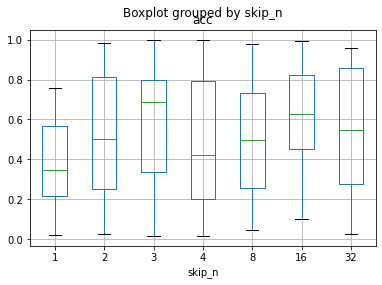

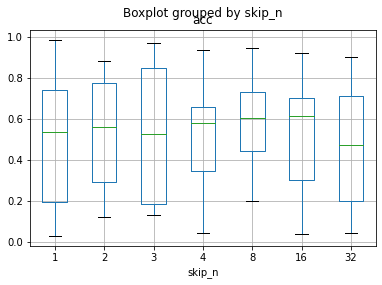

In [73]:
for policy in policies:
    t_df = quality_df.query(f'pol == "{policy}"')
    print(f'Plot for {policy}')
    t_df.boxplot(column='acc', by='skip_n')